# Tutorial how to use the spectrum decompositer

## packages

In [1]:
import pylab as pl
from matplotlib import pyplot as plt 
import numpy as np 
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
import math
from mpmath import linspace
from pylab import figure, cm
from matplotlib.colors import LogNorm
import pickle

## load the theory or sample spectrums
### loading(plotting) 
-args:  // abc, abab spectra read? // normalization? $\newline$
    plotting = boolean if it’s true you can see the input spectrums $\newline$
-working $\newline$
For loop's creating 4 list's inside x,y datas read indexes between 2500 and 3000. If you want read some specific you must change this params. We works with normalized curves, that reason  the code find the minimum values and with this values decreas the curves, than divide with his max vaule. The code return with all values. 


In [2]:
def loading(plotting = False):
    "load single AB, ABC spectrum"
    abc = np.loadtxt('ABC_green_bulk_sample6.txt', skiprows=2)
    abab = np.loadtxt('AB_bulk_green_2.txt', skiprows=2)
    if plotting == True:
        fig, ax1 = plt.subplots(figsize=(6.5, 4))
    
        left, bottom, width, height = [0.55, 0.64, 0.35, 0.3]
        ax2 = fig.add_axes([left, bottom, width, height])
    
        ax2.plot(abab[:, 0], gaussian_filter(1.6 * abab[:, 1] - 500, sigma=0), 'b')
        ax2.plot(abc[:, 0], gaussian_filter(abc[:, 1], sigma=0), 'r')
    
        ax1.set_xlim([1100, 3000])
        ax1.set_ylim([875, 1075])
        ax1.set_xlabel('Raman shift [$\mathrm{cm^{-1}}$]', size=15)
        ax1.set_ylabel('intensity [a.u.]', size=15)
        ax1.tick_params(axis='x', labelsize=15)
        ax1.tick_params(axis='y', labelsize=15)
    
        ax2.set_xlim([2550, 2850])
        ax2.set_ylim([875, 1000])
        ax2.tick_params(axis='x', labelsize=12)
        ax2.tick_params(axis='y', labelsize=12)
    
        plt.show()

    zoomabx=[]; zoomaby =[]; zoomabcx=[]; zoomabcy=[];
    
    for i in range(len(abab)):
        if abab[i][0] > 2500 and abab[i][0] < 3000:
            zoomabx.append(abab[i][0])
            zoomaby.append(abab[i][1])    
    
    for i in range(len(abc)):
        if abc[i][0] > 2500 and abc[i][0] < 3000:
            zoomabcx.append(abc[i][0])
            zoomabcy.append(abc[i][1])
            
    zoomabcx = np.array(zoomabcx);zoomabcy = np.array(zoomabcy)
    zoomabcy=zoomabcy-min(zoomabcy);zoomaby=zoomaby-min(zoomaby);
    na=max(zoomaby);naby=zoomaby/na
    nb=max(zoomabcy);nabcy=zoomabcy/nb
    nabcy=np.array(nabcy);naby=np.array(naby)
    mb=(zoomabx[np.unravel_index(np.argmax(zoomaby, axis=None),zoomaby.shape)[0]])
    mc=(zoomabcx[np.unravel_index(np.argmax(zoomabcy, axis=None),zoomabcy.shape)[0]])
    delta=mc-mb
    
   
    return zoomabx, zoomaby , zoomabcx, zoomabcy,na,nb,naby,nabcy,delta


## Fit from the specrums and make the "working's curves"

### lorentzian2/lorentzian4 
Func's for curve fit

### l2fit(), f4fit()
These curves make the fit. When we use the sample spectrums it' gonna be work, must nothing to do. If makes error ( basic err: Optimal parameters not found: Number of calls to function has reached maxfev = 3200. ) we must play with g params.

### abfugg(), abcfugg() 
We use later, when we want to find the x and y shift in sample

In [3]:
def lorentzian2( x,xb0 ,yb0,q,a1, b1, g1, a2, b2, g2 ):
    return ((yb0+((a1*q) * g1**2) / ( g1**2 + ( x - b1 + xb0 )**2))+ 
            (yb0+((a2*q) * g2**2) / ( g2**2 + ( x - b2 + xb0 )**2)))

def abfugg(x, x0ab,y0ab):
        return lorentzian2(x, x0ab, y0ab ,*poptab[2::])

def l2fit():
    "AB fit"
    yb0 = 880;xb0 = 0;q=1;a1 = 927;b1 = 2720;g1 = 17;a2 = 905;b2 = 2687;g2 = 25
    #yb0 = 890;xb0 = 0;a1 = 872;b1 = 2720;g1 = 12;a2 = 880;b2 = 2705;g2 = 18;q=1
    poptab, pcovab = curve_fit(lorentzian2, zoomabx, naby, p0=[xb0,yb0,q, a1, b1, g1, a2, b2, g2])
    perrab = np.sqrt(np.diag(pcovab)[::])
    print(poptab)
    abfit = lorentzian2(zoomabx, *poptab)
    plt.plot(zoomabx,naby)
    plt.plot(zoomabx,abfit)
    return abfit,poptab,perrab

def lorentzian4(x, x0,y0, q,  a1, b1, g1, a2, b2, g2, a3, b3, g3, a4, b4, g4):
    return ((y0 + ((a1 * q) * g1 ** 2) / (g1 ** 2 + (x - b1 + x0) ** 2)) + 
                (y0 + ((a2 * q) * g2 ** 2) / (g2 ** 2 + (x - b2 + x0) ** 2)) +
                +(y0 + ((a3 * q) * g3 ** 2) / (g3 ** 2 + (x - b3 + x0) ** 2)) + 
                (y0 + ((a4 * q) * g4 ** 2) / (g4 ** 2 + (x - b4 + x0) ** 2)))

    

def abcfugg(x, x0,y0):
        return lorentzian4(x, x0,y0, *poptabc[2::])
        
def l4fit():
    "ABC fit"
    x0 = 0; y0 = 880; q =1; a1 = 910;b1 = 2688; g1 = 13;a2 = 909;b2 = 2710;g2 = 19;
    a3 = 909;b3 = 2725;g3 = 19;a4 = 888;b4 = 2640;g4 = 22;
    poptabc, pcovabc = curve_fit(lorentzian4, zoomabcx, nabcy,
                                 p0=[x0,y0, q, a1, b1, g1, a2, b2, g2, a3, b3, g3, a4, b4, g4])
    
    perrabc =  np.sqrt(np.diag(pcovabc)[::])
    abcfit = lorentzian4(zoomabcx, *poptabc)
    plt.plot(zoomabcx,nabcy)
    plt.plot(zoomabcx,abcfit)
    print(poptabc)
    return abcfit,poptabc,perrabc

## Load the map
### readmap(map_name)
-arg:  $\newline$
    map_name: np.array, the raman map's name. Must be dimensional correcty! (1/rel cm)  $\newline$
-work:  $\newline$
    Separate the first row, because here we can  find the x coordinates. We add to a list, and after delet this. 
After we read for rows by rows and separete for two list. One should we find all datas (nagymatrix), and one with      (matrix) only the 2D peak and his neigthbor areas. Every code (R/G/B) has different parameters in for lop (in if ) because the lasers has different raman shift. When we use a spectrum with correctly zero point will not be changes the borders. 

In [4]:
def readmap(map_name):
    mp = np.loadtxt(map_name)
    ini=[];X=[]
    for i in range(len(mp)):
        ini.append(mp[i][0])
        if i > 850 and i < 1210:
            X.append(mp[i][0])
    mp=np.delete(mp, 0, axis=1)
    nagymatrix=[];matrix=[]
    for u in range(0,len(mp[0])):
        pixel=[];szurt=[]
        for i in range(0,len(mp)):
            pixel.append(mp[i][u])
            if i > 850 and i < 1210:
                szurt.append(mp[i][u])
        nagymatrix.append(pixel)
        matrix.append(szurt)
    return nagymatrix, matrix,ini,X

## Identify the graphite, and filtering for the noise and background
In this code use two different way to find the noisy parts, and the backround. This to part work toghered for the best result. In this capture I will show the first method. 
### finder(nagymatrix,g_peek):
-arg: 
  - nagymatrix : np array, Upper we save the whole raman spectrum, here we use this list. 
  - g_peek: int/float, we must set the avarge high (LIMSUP!) of G peak. We filtering for the G peak and his high
return non_graphene :boolean if is true we have signal only for the Si driver. 


In [5]:
def finder(nagymatrix,g_peak): 
    "Find graphite with G peak (g_peak: avg size of g_peak) "
    array_nagy=np.array(nagymatrix)
    non_graphene = array_nagy < g_peak 
    return non_graphene

## Fit the xshift, yshitf for theory curves in map
In this section we fitting and fixing the shifts. You must search an ab and abc domain and with this spectrum we set the shifts for the decompositon. We must fixing this params, because when we want a physicly correctly result.
### find_peaks()
- args
   - Ab_map_index/Ab_map_index: int , the index for the AB/ABC single spectrum take out of the map (matrix)
   - xb0=-40000,yb0=450,x0=400,y0=220, fitting params. In standart case we should be use this numbers, when this params cant fit try to change xb0/x0
   
### abxslide/abcxslide()
Inner functions. This two funcions make the fit, and make a plot where we can check the result

- return 
    - ABC,AB: the theory curves with correct shifts
    - cba, ba: the fitting parameters 


In [6]:
def find_peaks(Ab_map_index,Abc_map_index,xb0=-40000,yb0=450,x0=400,y0=220):
    "find peaks in x scale "
    "xb0,yb0- params for ab"
    "xb,yb- params for abc"
    
    ya=matrix[Ab_map_index]
    pl.plot(x,ya,label='ab spect')
    def abxslide(x,ya,xb0,yb0):
        ba, bba =curve_fit(abfugg,x,y,p0=[xb0,yb0],bounds=((-3e+5,-1000),(3e+5,1000)))
        pl.plot(x,abfugg(x,*ba),label='ab fit')
        AB =abfugg(x,*ba)
        print(ba)
        return AB, ba
    
    y=matrix[Abc_map_index]
    pl.plot(x,y,label='abc spect')
    def abcxslide(x,y,x0,y0):
        cba, ccba =curve_fit(abcfugg,x,y,p0=[x0,y0],bounds=((-3e+05,-1000),(3e+05,1000)))
        pl.plot(x,abcfugg(x,*cba),label='abc fit')
        plt.legend()
        print(cba)
        ABC = abcfugg(x,*cba)
        return ABC, cba
    
    plt.legend()
    AB,ba= abxslide(x,y0,xb0,yb0)
    ABC,cba= abcxslide(x,y,x0,y0)
    
    return ABC,cba,AB,ba

## mapping 
### mapping()
- arg:
    - x,y: np.array, from readmap - X and matrix[]
    - egylista: empty list 
    - errAB,errABC : empty list
    - find_non_graph: boolean,  from finder, 
-work: make a curve fit with func tog(). This func have 4 params, h1 is the coefficient for the linearcombination, t1, t2 is a scale for y axle and zoomsize is a  scale. 
### mapclac()
- arg: 
    - picklename: str, random name for save solution.pickle
- work: Is a loope, for the hole map. Work woth except try, when mapping return with 'RuntimeError'. Thats mean we cant fit, and in generaly we don't have graphene, or very noisy. With this func we save automaticly the fitting params, and errors in 3 pickle file. 

In [7]:
def mapping(x,y,egylista,errAB,errABC,find_non_graph):
    def tog(x,h1,t1,t2,zoomsize):
        return((h1*(ABC+t1) + (1-h1)*(AB+t2))*zoomsize)
    
    popt,pcov = curve_fit(tog,x,y,bounds=((0,-1000,-1000,0),
                                      (1,1000,1000,10)))
    errAB= np.sqrt((AB - tog(x,*popt))**2)
    errABC = np.sqrt((ABC-tog(x,*popt))**2)
    
    errbar = np.sum(np.abs(errAB[::]))/len(errAB[::])+np.sum(np.abs(errABC[::]))/len(errABC[::])
    
    if find_non_graph == True and (np.sum(tog(x,*popt)) /(len(tog(x,*popt)) / errbar)) > 0.004:
        popt=[0,0,0,0]
    egylista.append(popt)
    
    return(egylista,errAB,errABC)   

def mapcalc(picklename):
    for i in range (len(matrix)):
        errAB=[];errABC=[]
        egylista=[];y= matrix[i]; find_non_graph=np.all(non_graphene[i][400:900]==True)
        try:
            egylista,errAB,errABC= mapping(x,y,egylista,errAB,errABC,find_non_graph)
        except(RuntimeError):
            egylista=[-1,0]
            errAB=[-10,0]
            errABC=[-10,0]
            
        kiiertekeltmap.append(egylista)
        ABerrmap.append(errAB)
        ABCerrmap.append(errABC)

        
    szazalek=[]
    a = np.array([1, 2, 3])
    for i in range(len(kiiertekeltmap)):
        if type(kiiertekeltmap[i][0]) == type(a):
            #szazalek.append((kiiertekeltmap[i][0][0]/((kiiertekeltmap[i][0][0])+(kiiertekeltmap[i][0][1])))*100)
            szazalek.append(kiiertekeltmap[i][0][0]*100)
        else:
            szazalek.append(-1)
    with open(picklename +'.pickle', 'wb') as handle:
        pickle.dump(kiiertekeltmap, handle)
    with open(picklename+'AB_error' +'.pickle', 'wb') as handle:
        pickle.dump(ABerrmap, handle)
    with open(picklename+'ABC_error' +'.pickle', 'wb') as handle:
        pickle.dump(ABCerrmap, handle)    
    return szazalek,ABerrmap,ABCerrmap

In [12]:
def picture(width,szazalek,ABerrmap,ABCerrmap,AB_pos,ABC_pos,er_min=0,er_max=10,log=False):
    def pic_map(datas):
        ekep=[];o=0;esor=[]
        while o < len(datas):
            esor.append(datas[o])
            if o !=0 :
                if width != 0 : 
                    if (o+1) % width == 0:
                        ekep.append(esor)
                        esor=[]
                elif (o+1) % round(np.sqrt(len(datas)))== 0:
                    ekep.append(esor)
                    esor=[]
            o += 1
        return np.array(ekep)     
        
    def heatmap2d(arr: np.ndarray):
        pl.imshow(arr, cmap='gist_ncar',interpolation='none') #'gist_ncar'
        pl.colorbar()
        pl.show()
        
    kep=pic_map(szazalek)
    heatmap2d(kep)
    
    ablocerr=[]
    for i in range(len(ABerrmap)):
        ablocerr.append(np.sum(np.abs(ABerrmap[i][::]))/len(ABerrmap[i])+np.sum(np.abs(ABerrmap[i][::]))/len(ABerrmap[i]))
    abclocerr=[]
    for i in range(len(ABerrmap)):
        abclocerr.append(np.sum(np.abs(ABCerrmap[i][::]))/len(ABCerrmap[i])+np.sum(np.abs(ABCerrmap[i][::]))/len(ABCerrmap[i])) 
    #err_min=((ablocerr[AB_pos]+abclocerr[ABC_pos])/2+(ablocerr[AB_pos]+abclocerr[ABC_pos])/5),
    #err_max=((ablocerr[AB_pos]+abclocerr[ABC_pos])/2-(ablocerr[AB_pos]+abclocerr[ABC_pos])/5),
    def heatmap2d(arr: np.ndarray,tit):
        pl.imshow(arr, cmap='inferno',interpolation='none', vmin=er_min, vmax=er_max) #'gist_ncar'
        pl.title(tit)
        pl.colorbar()
        pl.show()
    #for i in ABCerrmap:
     #   ABC_locerr.append(np.sum(np.abs(i[::]))/len(i))
   
    abcerror=pic_map(abclocerr);aberror=pic_map(ablocerr)
    heatmap2d(abcerror,'abc error');heatmap2d(aberror,'ab error')
    
    if log == True:
        def logkep(ekep,tit):
            f = figure(figsize=(6.2, 5.6))
            ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
            axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
            
            im = ax.matshow(ekep, cmap='inferno',interpolation='none', norm=LogNorm(vmin=30, vmax=70))    
            t = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0,1.5,2,3,5,10]
            f.colorbar(im,cax=axcolor, ticks=t, format="$%.2f$")
            f.title('log'+tit)
            
            f.show()
        logkep(abcerror,'abc error')
        logkep(aberror,'ab error')

2023-04-12 19:47:21,539 [192] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-3-097d570d707e>:13: RuntimeWarning: invalid value encountered in sqrt
  perrab = np.sqrt(np.diag(pcovab)[::])

2023-04-12 19:47:21,691 [192] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-3-097d570d707e>:38: RuntimeWarning: invalid value encountered in sqrt
  perrabc =  np.sqrt(np.diag(pcovabc)[::])



[1.50483607e+03 2.28901786e-03 1.62903597e+00 1.65197559e-01
 4.17739666e+03 2.16603415e+01 5.59626651e-01 4.22184710e+03
 1.64081175e+01]
[ 7.44749220e+00 -4.45086501e-05 -2.02102725e+00 -3.83963406e-01
  2.69369923e+03 -1.94258919e+01 -3.62354283e+01  2.72765170e+03
 -1.20401359e+01  3.58729560e+01  2.72764398e+03 -1.19500596e+01
 -7.76914163e-02  2.64727276e+03 -2.73048701e+01]


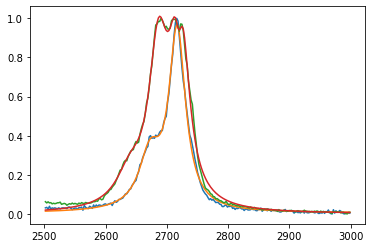

In [9]:
zoomabx,zoomaby,zoomabcx,zoomabcy,na,nb,naby,nabcy,delta=loading(False)
abfit,poptab,abfit0_errors=l2fit()
abcfit,poptabc,abcfit0_errors=l4fit()

In [10]:
nagymatrix, matrix,ini, x = readmap("sample_6_green_map.txt")  
non_graphene= finder(nagymatrix,950)
for i, e in enumerate(matrix):
    e= e- min(e) 
    matrix[i]= e/max(e)

[1.51122107e+03 3.56890962e-02]
[8.28916873e+00 4.25974696e-03]


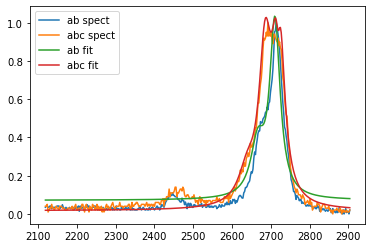

In [13]:
ABC,cba,AB,ba=find_peaks(2567,2600,1.50483607e+03, 2.28901786e-03,6.88570673e+00, -4.50417775e-05)
ABC = np.array(ABC, dtype=float);AB = np.array(AB, dtype=float)

In [14]:
kiiertekeltmap=[];ABerrmap=[];ABCerrmap=[]
szazalek,ABerrmap,ABCerrmap=mapcalc('mp')

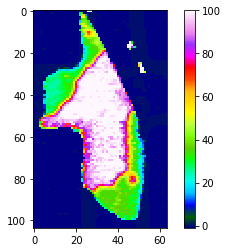

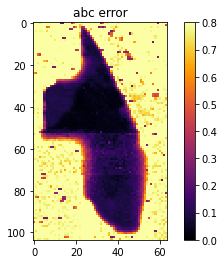

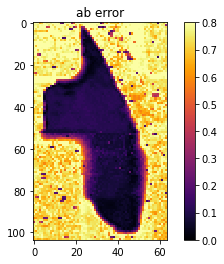

In [17]:
picture(64,szazalek,ABerrmap,ABCerrmap,2200,2600,0,0.8)